In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
print(tf.__version__)
tf.test.is_gpu_available()
plt.style.use('seaborn')

2.7.0
Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


In [2]:
# Import Dataset
(trainX, trainY), (testX, testY) = tf.keras.datasets.fashion_mnist.load_data()
print(f"Train: X: {trainX.shape}    y: {trainY.shape}")
print(f"Test: X: {testX.shape}    y: {testY.shape}")

4431872/4422102 [==============================] - 0s 0us/step
Train: X: (60000, 28, 28)    y: (60000,)
Test: X: (10000, 28, 28)    y: (10000,)


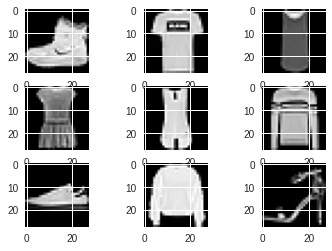

In [3]:
# Plot out first 10 images
for i in range(9):
    plt.subplot(330 + 1 + i)
    plt.imshow(trainX[i], cmap=plt.get_cmap("gray"))
plt.show()

In [4]:
# Reshape images
trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
# trainY = tf.keras.utils.to_categorical(trainY) # One-hot encoding
testX = testX.reshape((testX.shape[0], 28, 28, 1))
# testY = tf.keras.utils.to_categorical(testY) # One-hot encoding

In [6]:
from keras.preprocessing.image import ImageDataGenerator

dataGen = ImageDataGenerator(
    rotation_range=10,
    horizontal_flip=True,
    vertical_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1,
)
dataGen.fit(trainX)

In [7]:

model = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1./255 , input_shape=(28, 28, 1)),
    tf.keras.layers.Conv2D(32, (3, 3), activation="relu", kernel_initializer="he_uniform"),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation="relu", kernel_initializer="he_uniform", input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(100, activation="relu", kernel_initializer="he_uniform"),
    tf.keras.layers.Dense(10, activation="softmax")
])
model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.5),
    metrics=['accuracy'],
)


In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 28, 28, 1)         0         
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0

In [9]:
def plotLossAccGraph(result):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
    ax1.plot(result.history['loss'], label='Training Loss')
    ax1.plot(result.history['val_loss'], label='Validation Loss')
    ax1.set_title('Training and Validation Loss')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Loss')
    # ax1.set_ylim(bottom=0.0, top=0.6)
    ax1.legend()

    ax2.plot(result.history['accuracy'], label='Training Accuracy')
    ax2.plot(result.history['val_accuracy'], label='Validation Accuracy')
    ax2.set_title('Training and Validation Accuracy')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Accuracy')
    # ax2.set_ylim(bottom=0.85, top=1.0)
    ax2.legend()

    plt.show()


In [10]:

epochs = 50
batch = 512

def train(model, epochs, batch):
    result = model.fit(dataGen.flow(trainX, trainY, batch_size=1024),validation_data=(testX, testY), epochs=epochs, batch_size=batch)
    return result



Epoch 1/50
59/59 [==============================] - 25s 271ms/step - loss: 1.1744 - accuracy: 0.5791 - val_loss: 0.8120 - val_accuracy: 0.7005
Epoch 2/50
59/59 [==============================] - 16s 270ms/step - loss: 0.7583 - accuracy: 0.7198 - val_loss: 0.6523 - val_accuracy: 0.7568
Epoch 3/50
59/59 [==============================] - 16s 265ms/step - loss: 0.6742 - accuracy: 0.7491 - val_loss: 0.6445 - val_accuracy: 0.7651
Epoch 4/50
59/59 [==============================] - 16s 266ms/step - loss: 0.6254 - accuracy: 0.7671 - val_loss: 0.5867 - val_accuracy: 0.7817
Epoch 5/50
59/59 [==============================] - 16s 269ms/step - loss: 0.5999 - accuracy: 0.7794 - val_loss: 0.5817 - val_accuracy: 0.7741
Epoch 6/50
59/59 [==============================] - 16s 272ms/step - loss: 0.5671 - accuracy: 0.7889 - val_loss: 0.5454 - val_accuracy: 0.7968
Epoch 7/50
59/59 [==============================] - 16s 270ms/step - loss: 0.5541 - accuracy: 0.7946 - val_loss: 0.5056 - val_accuracy: 0.8111

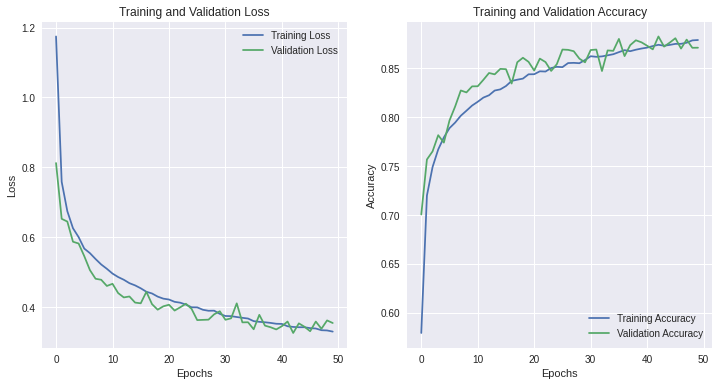

In [11]:
result = train(model, epochs, batch)
plotLossAccGraph(result)


In [12]:
model1 = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1./255, input_shape=(28, 28, 1)),

    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.BatchNormalization(),


    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.BatchNormalization(),

    tf.keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.BatchNormalization(),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax"),
])
model1.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss="sparse_categorical_crossentropy",
    metrics=['accuracy']
)


In [13]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 28, 28, 1)         0         
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 64)        640       
                                                                 
 conv2d_3 (Conv2D)           (None, 28, 28, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 batch_normalization (BatchN  (None, 14, 14, 64)       256       
 ormalization)                                                   
                                                                 
 conv2d_4 (Conv2D)           (None, 14, 14, 128)      

In [14]:
result1 = model1.fit(trainX, trainY, validation_data=(testX, testY), epochs=50, batch_size=1024)

Epoch 1/50
59/59 [==============================] - 10s 131ms/step - loss: 0.6013 - accuracy: 0.7964 - val_loss: 2.6302 - val_accuracy: 0.1800
Epoch 2/50
59/59 [==============================] - 6s 95ms/step - loss: 0.2795 - accuracy: 0.8962 - val_loss: 2.8167 - val_accuracy: 0.1864
Epoch 3/50
59/59 [==============================] - 6s 95ms/step - loss: 0.2239 - accuracy: 0.9172 - val_loss: 3.0983 - val_accuracy: 0.2138
Epoch 4/50
59/59 [==============================] - 6s 95ms/step - loss: 0.1851 - accuracy: 0.9320 - val_loss: 3.1412 - val_accuracy: 0.1921
Epoch 5/50
59/59 [==============================] - 6s 95ms/step - loss: 0.1596 - accuracy: 0.9411 - val_loss: 3.1225 - val_accuracy: 0.2350
Epoch 6/50
59/59 [==============================] - 6s 95ms/step - loss: 0.1310 - accuracy: 0.9514 - val_loss: 2.4834 - val_accuracy: 0.2753
Epoch 7/50
59/59 [==============================] - 6s 95ms/step - loss: 0.1123 - accuracy: 0.9585 - val_loss: 1.3515 - val_accuracy: 0.5278
Epoch 8/50


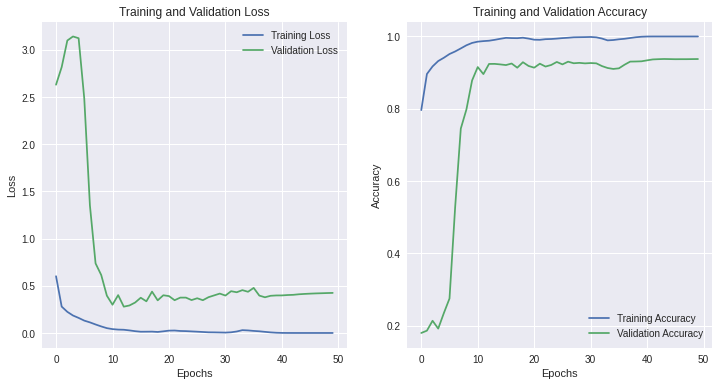

In [15]:
plotLossAccGraph(result1)

In [16]:
model1.save("mnist_model.h5")